<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_5_python_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

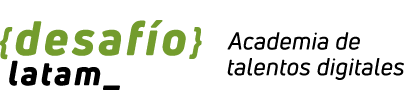

<center><h1> <font color='green'>Guía de estudio N° 2 - Manipulación y transformación de datos (Parte II)</font></h1></center>


😀¡Hola! Te damos la bienvenida a esta nueva guía de estudio.


## <font color='green'>¿En qué consiste esta guía?</font>
La siguiente guía de estudio tiene como objetivo que puedas revisar lo abordado en clases, variando los parámetros cuando corresponda para que puedas observar el efecto de estas modificaciones.

<center>

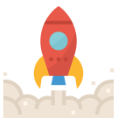

</center>

<center> <strong>¡Vamos con todo!</strong> </center>


## <font color='green'>Tabla de contenidos</font>

1. Discretización de datos
    - El método pd.cut()
    - El método np.where
    - El método pd.get_dummies()
2. Manipulación de strings
3. Manipulación de Date & Time
    - Cambiando formatos
    - Filtrado por fecha

<center>

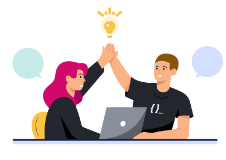

</center>

<center> <font color='green'> <strong>¡Comencemos!</strong></font> </center>

 # <font color='green'>Discretización de datos</font>

La discretización de datos es un proceso mediante el cual se convierten variables continuas en variables discretas o categóricas. La discretización de datos puede ser útil para crear nuevos atributos, como intervalos o columnas binarias, que se pueden utilizar para agrupar y visualizar los datos.

## <font color='green'>El método pd.cut()</font>
Este método se utiliza para discretizar una variable continua en intervalos o categorías. Por defecto, esta función devuelve un objeto de la clase **pd.IntervalIndex,** que representa los intervalos resultantes. Sin embargo, también es posible devolver los valores personalizados en lugar de los intervalos utilizando el parámetro labels. Su sintaxis es la siguiente:

<center><b>pd.cut(x, bins, labels, include_lowest, right)</b></center>

donde:

- **x:** corresponde al conjunto de datos numéricos.
- **bins:** es número de intervalos o la secuencia de los límites de los intervalos. También se pueden especificar etiquetas para los intervalos usando una lista de etiquetas.
- **labels:** es una lista de etiquetas para los intervalos. Si se proporciona, debe tener la misma longitud que bins - 1.
- **include_lowest:** es un valor booleano que indica si se debe incluir el límite inferior del primer intervalo.
- **right:** Se utiliza para controlar si los intervalos son cerrados a la derecha o abiertos a la derecha. Cuando se establece en True (valor predeterminado), los intervalos son cerrados a la derecha, lo que significa que el valor límite derecho del intervalo está incluido en el intervalo

Veremos con un ejemplo:

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'Edad': [20, 25, 30, 35, 40, 45, 50, 55, 60]})

# Discretizar los datos en intervalos
intervalos = [0, 30, 40, 50, 100]  # Definir los intervalos deseados
""" # son los intervalos que genera
[0,30] -> joven
]30,40] -> Adulto Joven
]40,50]
]50,100]
"""
# Etiquetas para las categorías
etiquetas = ['Joven', 'Adulto joven', 'Adulto', 'Adulto mayor']

# Discretizar y devolver valores en lugar de intervalos
df['GrupoEdad'] = pd.cut(df['Edad'], bins=intervalos, labels=etiquetas)

# Imprimir el DataFrame resultante
df

,Edad,GrupoEdad
0,20,Joven
1,25,Joven
2,30,Joven
3,35,Adulto joven
4,40,Adulto joven
5,45,Adulto
6,50,Adulto
7,55,Adulto mayor
8,60,Adulto mayor


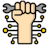 **¡Manos a la obra!**

Cambia los parámetros anteriores y comprueba los resultados. ¿Qué parámetros son opcionales? ¿Cuáles son sus valores por defecto?

Este procedimiento es de mucha utilidad para etiquetar datos basados en la magnitud de un valor numérico, lo que nos permite interpretar esa información de forma discreta. También podemos utilizar pd.cut() para que los valores discretos de salida sean numéricos, es decir, usar etiquetas numéricas.

Si deseas utilizar etiquetas numéricas en lugar de etiquetas categóricas al discretizar los datos, puedes asignar valores numéricos a las etiquetas y luego convertir la columna resultante en numérica.


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'Edad': [20, 25, 30, 35, 40, 45, 50, 55, 60]})

# Discretizar los datos en intervalos
intervalos = [0, 30, 40, 50, 100]  # Definir los intervalos deseados
etiquetas = [1, 2, 3, 4]  # Etiquetas numéricas para las categorías

# Discretizar y devolver valores en lugar de intervalos
df['GrupoEdad'] = pd.cut(df['Edad'], bins=intervalos, labels=etiquetas)

df

df.dtypes

Edad            int64
GrupoEdad    category
dtype: object

In [ ]:

# Convertir la columna GrupoEdad en numérica
df['GrupoEdad'] = pd.to_numeric(df['GrupoEdad'])

df

,Edad,GrupoEdad
0,20,1
1,25,1
2,30,1
3,35,2
4,40,2
5,45,3
6,50,3
7,55,4
8,60,4


In [ ]:
df.dtypes

Edad         int64
GrupoEdad    int64
dtype: object

In [ ]:
df = pd.DataFrame({'Edad': [20, 25, 30, 35, 40, 45, 50, 55, 60]})

# Discretizar los datos en intervalos
intervalos = [0, 30, 40, 50, 100]  # Definir los intervalos deseados
etiquetas = [1, 2, 3, 4]  # Etiquetas numéricas para las categorías

# Discretizar y devolver valores en lugar de intervalos
df['GrupoEdad'] = pd.cut(df['Edad'], bins=intervalos, labels=etiquetas)
df

,Edad,GrupoEdad
0,20,1
1,25,1
2,30,1
3,35,2
4,40,2
5,45,3
6,50,3
7,55,4
8,60,4


In [ ]:
df = pd.DataFrame({'Edad': [20, 25, 30, 35, 40, 45, 50, 55, 60, 100]})

# Discretizar los datos en intervalos
intervalos = [0, 30, 40, 50, 100]  # Definir los intervalos deseados
etiquetas = [1, 2, 3, 4]  # Etiquetas numéricas para las categorías

# Discretizar y devolver valores en lugar de intervalos
df['GrupoEdad'] = pd.cut(df['Edad'], bins=intervalos, labels=etiquetas, right=False)

""" # son los intervalos que genera
[0,30[ -> 1
[30,40[ -> 2
[40,50[ -> 3
[50,100[ ->  4
"""

df

,Edad,GrupoEdad
0,20,1
1,25,1
2,30,2
3,35,2
4,40,3
5,45,3
6,50,4
7,55,4
8,60,4
9,100,NaN


En el ejemplo anterior, se utilizó pd.to_numeric() para convertir la columna "GrupoEdad" de tipo "category" a tipo "int". Esta conversión permite que los valores en la columna sean tratados como números en lugar de categorías, lo que facilita operaciones numéricas posteriores. Una alternativa a este método es **.astype()** utilizando el parámetro dtype para indicar el tipo de dato nuevo, como se muestra:

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'Edad': [20, 25, 30, 35, 40, 45, 50, 55, 60]})

# Discretizar los datos en intervalos
intervalos = [0, 30, 40, 50, 100]  # Definir los intervalos deseados
etiquetas = [1, 2, 3, 4]  # Etiquetas numéricas para las categorías

# Discretizar y devolver valores en lugar de intervalos
df['GrupoEdad'] = pd.cut(df['Edad'], bins=intervalos, labels=etiquetas)

# Convertir la columna GrupoEdad en numérica
df.astype({'GrupoEdad': 'int64'}).dtypes
df

,Edad,GrupoEdad
0,20,1
1,25,1
2,30,1
3,35,2
4,40,2
5,45,3
6,50,3
7,55,4
8,60,4


## <font color='green'>El método np.where()</font>
Se utiliza para aplicar una condición a un iterable y devolver valores distintos según se cumpla la condición. Por ejemplo, podemos usar np.where() para marcar valores de un conjunto de datos que son iguales a un valor o están dentro de un conjunto de valores. Si se cumple la condición, np.where() devuelve un valor determinado, y si no se cumple, devuelve otro valor. Observa su uso:

In [ ]:
import numpy as np

numeros = np.array([-1, 2, 3, -4, 5])
clasificacion = np.where(numeros >= 0, 'positivo', 'negativo')
clasificacion


array(['negativo', 'positivo', 'positivo', 'negativo', 'positivo'],
      dtype='<U8')

### Ejemplo

Clasifiquemos los ingresos de un grupo de personas en "altos" o "bajos" utilizando un umbral específico. Tomenos como ejemplo en conjunto de personas con sus respectivos ingresos, y fijaremos un umbral de $50000. Quienes tengan ingresos iguales o mayores a dicho valor serán categorizados como "Alto" en la escala de ingresos, y los que obtengan menos tendrán "Bajo"


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame(
{'Nombre': ['Juan', 'María', 'Pedro', 'Laura', 'Ana'],
 'Ingresos': [25000, 45000, 60000, 35000, 80000]})

# Definir umbral para clasificar ingresos
umbral = 50000

df

,Nombre,Ingresos
0,Juan,25000
1,María,45000
2,Pedro,60000
3,Laura,35000
4,Ana,80000


Utilizaremos ahora **np.where** para hacer nuestra clasificación

In [ ]:
# Utilizar np.where() para clasificar los ingresos
df['Clasificacion'] = np.where(df['Ingresos'] >= umbral, 'Alto', 'Bajo')

# Imprimir el DataFrame resultante
df

,Nombre,Ingresos,Clasificacion
0,Juan,25000,Bajo
1,María,45000,Bajo
2,Pedro,60000,Alto
3,Laura,35000,Bajo
4,Ana,80000,Alto


## <font color='green'>El método pd.get_dummies()</font>
Este método se utiliza para crear variables binarias o "dummy variables" a partir de variables categóricas. Las variables binarias son columnas de valores 0 o 1 que indican la presencia o ausencia de una categoría en particular.

Por ejemplo, si tenemos una columna que indica la nacionalidad de un grupo de personas en el aeropuerto, podemos usar pd.get_dummies() para crear dos nuevas columnas, una para pasajeros nacionales y otra para extranjeros, y marcar con 1 la columna correspondiente a cada caso, lo que facilita el análisis de los datos categóricos. Observa el ejemplo:

In [ ]:
data = {
    'Pasajero': ['Juan', 'María', 'Pedro', 'Laura', 'Francisca'],
    'Nacionalidad': ['N', 'N', 'E', 'N', 'E']
}

df = pd.DataFrame(data)

print(df)
pd.get_dummies(df, columns = ['Nacionalidad'])


    Pasajero Nacionalidad
0       Juan            N
1      María            N
2      Pedro            E
3      Laura            N
4  Francisca            E


,Pasajero,Nacionalidad_E,Nacionalidad_N
0,Juan,0,1
1,María,0,1
2,Pedro,1,0
3,Laura,0,1
4,Francisca,1,0


Al observar la salida notamos que se generan dos columnas pero una de ellas es redundante, ya que solo teniendo una de las dos es suficiente para denotar la nacionalidad del pasajero (Nacional o extranjero). Por defecto, se omitirá la primera columna generada por orden alfabético. (Nacionalidad_E  en este caso).

In [ ]:
pd.get_dummies(df, columns = ['Nacionalidad'], drop_first = True)

,Pasajero,Nacionalidad_N
0,Juan,1
1,María,1
2,Pedro,0
3,Laura,1
4,Francisca,0


# <font color='green'>Manipulación de strings</font>

Hasta ahora ya conocemos algunos métodos propios de los objetos de tipo string en Python. Veremos ahora cómo acceder a los métodos propios de los tipos de datos sobre una columna de un DataFrame. Para esto utilizaremos el mismo DataFrame anterior


In [ ]:
data = {
    'Pasajero': ['Juan', 'María', 'Pedro', 'Laura', 'Francisca'],
    'Nacionalidad': ['N', 'N', 'E', 'N', 'E']
}

df = pd.DataFrame(data)
df

,Pasajero,Nacionalidad
0,Juan,N
1,María,N
2,Pedro,E
3,Laura,N
4,Francisca,E


Si quisiéramos transformar los nombres de los pasajeros a minúsculas no aplicamos el método .lower() directamente, sino que debemos aplicar .str.lower():

In [ ]:
df['Pasajero_minuscula']=df['Pasajero'].str.lower()
df

,Pasajero,Nacionalidad,Pasajero_minuscula
0,Juan,N,juan
1,María,N,maría
2,Pedro,E,pedro
3,Laura,N,laura
4,Francisca,E,francisca


In [ ]:
df['Pasajero_mayuscula']=df['Pasajero'].str.upper()
df

,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula
0,Juan,N,juan,JUAN
1,María,N,maría,MARÍA
2,Pedro,E,pedro,PEDRO
3,Laura,N,laura,LAURA
4,Francisca,E,francisca,FRANCISCA


In [20]:
df['Nacionalidad_es_mayuscula'] = df['Nacionalidad'].str.isupper()
df


,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula,Pasajero_es_mayuscula,Nacionalidad_es_mayuscula
0,Juan,N,juan,JUAN,False,True
1,María,N,maría,MARÍA,False,True
2,Pedro,E,pedro,PEDRO,False,True
3,Laura,N,laura,LAURA,False,True
4,Francisca,E,francisca,FRANCISCA,False,True


In [21]:
df = df.drop(columns=['Pasajero_es_mayuscula'])

df

,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula,Nacionalidad_es_mayuscula
0,Juan,N,juan,JUAN,True
1,María,N,maría,MARÍA,True
2,Pedro,E,pedro,PEDRO,True
3,Laura,N,laura,LAURA,True
4,Francisca,E,francisca,FRANCISCA,True


Si no indicamos con .str que queremos acceder a métodos de la clase string, entonces arrojará un error indicando que una columna de tipo pd.Serie no tiene un método llamado .lower(). De la misma forma podemos acceder a cualquier método propio de la clase string, entre ellos:

- str.upper()
- str.lower()
- str.isupper()
- str.islower()
- str.isnumeric()
- str.replace()
- str.split()
- str.contains()
- str.find()

In [22]:
df['quitar_tilde']=df['Pasajero'].str.replace('í','i') ## soporta diccionarios
df

,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula,Nacionalidad_es_mayuscula,quitar_tilde
0,Juan,N,juan,JUAN,True,Juan
1,María,N,maría,MARÍA,True,Maria
2,Pedro,E,pedro,PEDRO,True,Pedro
3,Laura,N,laura,LAURA,True,Laura
4,Francisca,E,francisca,FRANCISCA,True,Francisca


In [23]:
df['aplicar_split'] = df['Pasajero'].str.split('a')

df

,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula,Nacionalidad_es_mayuscula,quitar_tilde,aplicar_split
0,Juan,N,juan,JUAN,True,Juan,"[Ju, n]"
1,María,N,maría,MARÍA,True,Maria,"[M, rí, ]"
2,Pedro,E,pedro,PEDRO,True,Pedro,[Pedro]
3,Laura,N,laura,LAURA,True,Laura,"[L, ur, ]"
4,Francisca,E,francisca,FRANCISCA,True,Francisca,"[Fr, ncisc, ]"


In [24]:
df['aplicar_find'] = df['Pasajero'].str.find('a')

df

,Pasajero,Nacionalidad,Pasajero_minuscula,Pasajero_mayuscula,Nacionalidad_es_mayuscula,quitar_tilde,aplicar_split,aplicar_find
0,Juan,N,juan,JUAN,True,Juan,"[Ju, n]",2
1,María,N,maría,MARÍA,True,Maria,"[M, rí, ]",1
2,Pedro,E,pedro,PEDRO,True,Pedro,[Pedro],-1
3,Laura,N,laura,LAURA,True,Laura,"[L, ur, ]",1
4,Francisca,E,francisca,FRANCISCA,True,Francisca,"[Fr, ncisc, ]",2


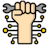 **¡Manos a la obra!**

¡Crea tus dataFrames y prueba esto métodos!

# <font color='green'>Manipulación de Date & Time</font>
## <font color='green'>Cambiando formatos</font>

De la misma forma en que existe un acceso a métodos de tipo string utilizando .str, existe también un acceso a métodos de tipo datetime, y accedemos a ellos utilizando .dt. Veamos el siguiente ejemplo.


In [40]:
import pandas as pd

data = {
    'Empleados': ['Juan', 'María', 'Pedro', 'Luis', 'Francisca','Matias'],
    'Fecha_Incorporacion': ['2022-10-01', '2022-03-01', '2022-05-01', '2021-12-01', '2023-03-01','2024-03-27']
}

df=pd.DataFrame(data)

df.dtypes

## automaticamente python no detecta formas de fecha, por lo tanto le tenemos que decir siempre.

Empleados              object
Fecha_Incorporacion    object
dtype: object

Hasta este punto la columna Fecha Incorporacion es de tipo string. Pero queremos, naturalmente, trabajarla como una fecha para poder aceder a más posibilidades. Para esto se ocupa el método **pd.to_datetime()** que convierte una columna de tipo cadena de texto en formato de fecha, a un objeto de fecha y hora de Pandas.

In [41]:
df['Fecha_Incorporacion'] = pd.to_datetime(df['Fecha_Incorporacion'])

Algunos de los parámetros más importantes que acepta pd.to_datetime son:
- **arg:** Es el argumento que se va a convertir a fecha y hora. Puede ser una cadena, una lista de cadenas o una serie de Pandas.
- **format:** Es el formato de la cadena de fecha y hora. Si no se especifica, Pandas intentará adivinar el formato.
- **dayfirst:** Un booleano que indica si el primer elemento de la cadena de fecha y hora es el día. Si se establece en True, Pandas interpreta la fecha y hora con el formato día/mes/año.
- **yearfirst:** Un booleano que indica si el primer elemento de la cadena de fecha y hora es el año. Si se establece en True, Pandas interpreta la fecha y hora con el formato año/mes/día.

Ahora si podemos acceder a los métodos de fecha usando .dt

In [31]:
df['Fecha_Incorporacion_2'] = pd.to_datetime(df['Fecha_Incorporacion'])

df['Fecha_Incorporacion_2'] = pd.to_datetime(df['Fecha_Incorporacion_2'],format='%d-%m-%Y')
df

,Empleados,Fecha_Incorporacion,Fecha_Incorporacion_2
0,Juan,2022-10-01,2022-10-01
1,María,2022-03-01,2022-03-01
2,Pedro,2022-05-01,2022-05-01
3,Luis,2021-12-01,2021-12-01
4,Francisca,2023-03-01,2023-03-01


In [42]:
df['year']=df['Fecha_Incorporacion'].dt.year
df['mes']=df['Fecha_Incorporacion'].dt.month
df['dia']=df['Fecha_Incorporacion'].dt.day
df['semana']=df['Fecha_Incorporacion'].dt.week
df['dia_semana']=df['Fecha_Incorporacion'].dt.day_of_week
df

<ipython-input-42-a185a923e12e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['semana']=df['Fecha_Incorporacion'].dt.week


,Empleados,Fecha_Incorporacion,year,mes,dia,semana,dia_semana
0,Juan,2022-10-01,2022,10,1,39,5
1,María,2022-03-01,2022,3,1,9,1
2,Pedro,2022-05-01,2022,5,1,17,6
3,Luis,2021-12-01,2021,12,1,48,2
4,Francisca,2023-03-01,2023,3,1,9,2
5,Matias,2024-03-27,2024,3,27,13,2


Al utilizar .dt en una columna de un DataFrame en pandas, se puede acceder a una variedad de métodos y propiedades relacionados con fechas y horas. A continuación, se presentan algunos de los métodos y propiedades comunes disponibles al utilizar .dt:

- year: Devuelve el año de cada valor de fecha/hora.
- month: Devuelve el mes de cada valor de fecha/hora.
- day: Devuelve el día del mes de cada valor de fecha/hora.
- hour: Devuelve la hora de cada valor de fecha/hora.
- minute: Devuelve los minutos de cada valor de fecha/hora.
- second: Devuelve los segundos de cada valor de fecha/hora.
- microsecond: Devuelve los microsegundos de cada valor de fecha/hora.
- nanosecond: Devuelve los nanosegundos de cada valor de fecha/hora.
- weekday: Devuelve el día de la semana (como un número, donde 0 es lunes y 6 es domingo) de cada valor de fecha/hora.
- month_name: Devuelve el nombre del mes de cada valor de fecha/hora.
- day_name: Devuelve el nombre del día de la semana de cada valor de fecha/hora.
- is_leap_year: Devuelve un booleano que indica si cada valor de fecha/hora corresponde a un año bisiesto.

Puedes utilizar los métodos de los objetos de fecha y hora de Pandas para extraer información específica de las fechas. Por ejemplo, puedes utilizar el método dt.month para extraer el mes de una fecha y dt.month_name() para obtener el nombre del mes en inglés.

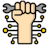 **¡Manos a la obra!**

¡Prueba estos métodos!

Puedes utilizar los métodos de los objetos de fecha y hora de Pandas para extraer información específica de las fechas. Por ejemplo, puedes utilizar el método dt.month para extraer el mes de una fecha y dt.month_name() para obtener el nombre del mes en inglés.

In [46]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'fecha': ['2022-05-02 12:00:00', '2022-05-03 07:00:00', '2022-05-04 16:00:00']})

# Convertir a formato de fecha y hora de Pandas
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer el mes de la fecha
df['mes'] = df['fecha'].dt.month

# Extraer el nombre del mes de la fecha
df['nombre_mes'] = df['fecha'].dt.month_name()

# Verificar el resultado
df

df['nombre_dia'] = df['fecha'].dt.day_name()


df['hora'] = df['fecha'].dt.hour

df


"""
para string str
para fechas dt
en pandas
"""

,fecha,mes,nombre_mes,nombre_dia,hora
0,2022-05-02 12:00:00,5,May,Monday,12
1,2022-05-03 07:00:00,5,May,Tuesday,7
2,2022-05-04 16:00:00,5,May,Wednesday,16


En ocasiones, los datos pueden contener fechas en formatos diferentes. Por ejemplo, si se encuentran en formato "día-mes-año" y queremos convertirlas a formato "año-mes-día", sde puede utilizar **pd.to_datetime** con el parámetro **format**, para especificar el formato de entrada y salida.


In [51]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'fecha': ['02-05-2022', '03-05-2022', '04-05-2022']})

# Convertir a formato de fecha y hora de Pandas. Especificamos el formato de entrada.
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')

# Verificar el resultado
print(df['fecha'])



0   2022-05-02
1   2022-05-03
2   2022-05-04
Name: fecha, dtype: datetime64[ns]


In [2]:
## libreria para fecha
from datetime import datetime
import pandas as pd

In [6]:
df = pd.DataFrame({'fecha': ['02-05-2022', '03-05-2022', '04-05-2022']})
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha_distinto_formato'] = df['fecha'].dt.strftime('%Y-%m-%d')
#df['fecha'].dt.strftime('%Y-%m-%d')

#df['fecha_distinto_formato'] = datetime.strptime(df['fecha'],'%Y-%m-%d') ## para cambiar formatos
df

,fecha,fecha_distinto_formato
0,2022-02-05,2022-02-05
1,2022-03-05,2022-03-05
2,2022-04-05,2022-04-05


## <font color='green'>Filtrado por fecha</font>

Se puede utilizar las fechas como criterio de filtrado para seleccionar filas específicas de un DataFrame. Por ejemplo, podemos seleccionar las filas que corresponden a un mes específico fijando su fecha de inicio y de término:

In [59]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'fecha': ['2022-05-02', '2022-05-03', '2022-06-04']})

# Convertir a formato de fecha y hora de Pandas
df['fecha'] = pd.to_datetime(df['fecha'])

df_mayo = df[(df['fecha'] >= '2022-05-01') & (df['fecha'] <= '2022-05-31') ]

# y -> &
# o -> |

# Verificar el resultado
df_mayo


,fecha
0,2022-05-02
1,2022-05-03


In [60]:
import pandas as pd

# Crear un DataFrame de ejemplo
df = pd.DataFrame({'fecha': ['2022-05-02', '2022-05-03', '2022-06-04']})

# Convertir a formato de fecha y hora de Pandas
df['fecha'] = pd.to_datetime(df['fecha'])

df_mayo = df[(df['fecha'] >= '2022-05-01') | (df['fecha'] <= '2022-05-31')]

# y -> &
# o -> |

# Verificar el resultado
df_mayo


,fecha
0,2022-05-02
1,2022-05-03
2,2022-06-04


Si tenemos una columna con edades, la podemos separar en categorías como "menores de 18 años", "de 18 a 30 años", "de 31 a 50 años", etc. El método "cut" toma como entrada la columna que deseamos discretizar y los límites de los intervalos que queremos definir. Por ejemplo:

In [61]:
import pandas as pd
import numpy as np

# fijamos la semilla aleatoria de numpy.
np.random.seed(0)

# generamos datos aleatorios.
edades_random = np.random.randint(1, 100, 20)

# creamos un dataframe con los datos aleatorios.
df = pd.DataFrame({'edad': edades_random})
df

,edad
0,45
1,48
2,65
3,68
4,68
5,10
6,84
7,22
8,37
9,88


Introduciremos ahora nuestros criterios de clasificación:

In [ ]:
intervalos = [0, 18, 30, 50, 100]
etiquetas = ["menores de 18", "de 18 a 30", "de 31 a 50", "mayores de 50"]


df['edad_categoria']=pd.cut(x = df['edad'], bins = intervalos, labels = etiquetas)
df

,edad,edad_categoria
0,45,de 31 a 50
1,48,de 31 a 50
2,65,mayores de 50
3,68,mayores de 50
4,68,mayores de 50
5,10,menores de 18
6,84,mayores de 50
7,22,de 18 a 30
8,37,de 31 a 50
9,88,mayores de 50


In [ ]:
### ayuda al desafio
import pandas as pd

df1 = pd.read_excel('archivo.xlsx',sheet_name = 'hoja')

df2

df3


df_base = df1.merge(df2,left_on = , right_on = ,validate='many_to_one').merge(df3).merge(df4).....



df_base['CustomerDays'] = df_base['CustomerDays'].dt.days


interval = [0,100,1000]

etiqueta = [0.1 , 0.2 ,]